### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [2]:
import numpy as np
import pandas as pd

### Series from lists

In [ ]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)
# whenever a series is created then two things will be there, one is value and other is index(automatically generated)

0       India
1    Pakistan
2         USA
3       Nepal
4    Srilanka
dtype: object

In [44]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs)
# indexes are automatically generated but we can manually give indexes also

In [33]:
# custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [ ]:
# setting a name
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

maths       67
english     57
science     89
hindi      100
Name: Nitish ke marks, dtype: int64

### Series from dict

In [34]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}
# by passing ditionary automatically keys will become index and values become values
marks_series = pd.Series(marks,name='nitish ke marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: nitish ke marks, dtype: int64

### Series Attributes

In [ ]:
# size
marks_series.size

4

In [ ]:
# dtype - gives the data type of values in the series
marks_series.dtype

dtype('int64')

In [ ]:
# name
marks_series.name

'nitish ke marks'

In [ ]:
# is_unique - checks if all the items in the series are unique or not
# if nothing is repeated then it returns True and if any item is repeated it returns False
marks_series.is_unique

pd.Series([1,1,2,3,4,5]).is_unique

False

In [ ]:
# index - gives all the indexes at once - this gives index object which has all the index values
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [45]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# values -- this gives all the values - this gives a numpy array
marks_series.values

array([ 67,  57,  89, 100])

### Series using read_csv

In [3]:
# with one col
# default behaviour of read_csv is creating a DataFrame but we are overriding that by using squeeze() method
subs = pd.read_csv('subs.csv').squeeze()
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [128]:
# with 2 cols - if we dont provide index with 2 column data then its not possible to make a series and it will 
# become a dataframe
vk = pd.read_csv('kohli_ipl.csv',index_col='match_no').squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [5]:
movies = pd.read_csv('bollywood.csv',index_col='movie').squeeze()
movies
# lead is the name of the values column and gnenerally the value column name will become name of series

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

### Series methods

In [ ]:
# head and tail
# in series index values can be same
subs.head() # by default gives top5 rows of the data, we can give custom values, tail is also similar

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [ ]:
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [ ]:
vk.tail(10)

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [15]:
# sample - gives a random sample 1 row, we can give custom values
movies.sample(5)

movie
Crazy Cukkad Family           Swanand Kirkire
Jai Ho (film)                     Salman Khan
Sorry Bhai!                      Shabana Azmi
Mumbai Se Aaya Mera Dost    Abhishek Bachchan
Bhaag Milkha Bhaag              Farhan Akhtar
Name: lead, dtype: object

In [13]:
# value_counts -> movies -> gives the frequency of each item in data - series_name.value_counts() - descending order

movies.value_counts()

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: lead, Length: 566, dtype: int64

In [16]:
# sort_values
vk.sort_values(ascending=False).head(1).values # this give the numpy array with value 113 
# if we dont want as numpy array and we want only value then give values[0]
# basically here method chaining is happening, output of one method is becoming input of other method

array([113])

In [17]:
vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int64

In [20]:
# sort_index -> inplace -> movies
# giving inplace true makes the changes permanant
movies.sort_index(ascending=False)

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [18]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
# vk.sort_values(inplace=True)

In [19]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

### Series Maths Methods

In [6]:
# count - gives total number of items from the series, similar to size, 
# but size counts missing values and count does not count missing values
vk.count()

215

In [7]:
# sum -> product
subs.sum()

49510

In [10]:
# there is a number 0 in the series hence all became zero
subs.product() 

0

In [12]:
# mean -> median -> mode -> std -> var
print(subs.mean())
print(vk.median())
print(movies.mode())
print(subs.std())
print(vk.var())

135.64383561643837
24.0
0    Akshay Kumar
Name: lead, dtype: object
62.67502303725269
688.0024777222344


In [13]:
subs.min()

33

In [ ]:
# min/max
subs.max()

396

In [14]:
# describe - gives summary
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

### Series Indexing

In [15]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

In [16]:
# negative indexing - this will not work in pandas
x[-1]

KeyError: -1

In [18]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [30]:
print(movies[0])
print(movies['Uri: The Surgical Strike'])
print(movies[-1]) # this -1 is working here, maybe because of our custom indexing is a string
# when custom idexing is a string -ve indexing is working
# both works, pandas internally also gives integer indexing thats why we are getting output with movies[0]

Vicky Kaushal
Vicky Kaushal
Akshay Kumar


In [31]:
vk # here also custom idexing

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [28]:
vk[-1]

KeyError: -1

In [35]:
marks_series[-1]

100

In [ ]:
# slicing
vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [ ]:
# negative slicing
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [36]:
movies[::2]
# here we are printing alternate movie names, similar to python

movie
Uri: The Surgical Strike                   Vicky Kaushal
The Accidental Prime Minister (film)         Anupam Kher
Evening Shadows                         Mona Ambegaonkar
Fraud Saiyaan                               Arshad Warsi
Manikarnika: The Queen of Jhansi          Kangana Ranaut
                                              ...       
Raaz (2002 film)                              Dino Morea
Waisa Bhi Hota Hai Part II                  Arshad Warsi
Kaante                                  Amitabh Bachchan
Aankhen (2002 film)                     Amitabh Bachchan
Company (film)                                Ajay Devgn
Name: lead, Length: 750, dtype: object

In [ ]:
# fancy indexing
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
# indexing with labels -> fancy indexing
movies['2 States (2014 film)']

'Arjun Kapoor'

### Editing Series - be careful while editing datasets, usually we read the data and use it

In [37]:
# using indexing
marks_series[1] = 100
marks_series

maths       67
english    100
science     89
hindi      100
Name: nitish ke marks, dtype: int64

In [42]:
# what if an index does not exist - evs is not there and when we try to edit it, a new entry will be inserted
# if it is not there and we try to read, then it gives error, ir it is not there and we try to write then it writes

marks_series['evs'] = 100

In [41]:
marks_series

maths       67
english    100
science     89
hindi      100
evs        100
Name: nitish ke marks, dtype: int64

In [46]:
# slicing - editing through slicing
runs_ser[2:4] = [100,100]
runs_ser

0     13
1     24
2    100
3    100
4    100
dtype: int64

In [75]:
# fancy indexing
# runs_ser[[0,3,4]] = [0] -> this will not work
runs_ser[[0,3,4]] = [0,0,0]
runs_ser

0      0
1     24
2    100
3      0
4      0
dtype: int64

In [48]:
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

### Copy and Views

### Series with Python Functionalities

In [49]:
# len/type/dir/sorted/max/min
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs))
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__re

In [50]:
# type conversion
list(marks_series) # this will convert all the values into list

[67, 100, 89, 100, 100]

In [51]:
dict(marks_series)

{'maths': 67, 'english': 100, 'science': 89, 'hindi': 100, 'evs': 100}

In [54]:
# membership operator
# by default in operator works on indexes
'2 States (2014 film)' in movies

True

In [58]:
'Alia Bhatt' in movies # giving false because its searching in indexes

False

In [59]:
'Alia Bhatt' in movies.values

True

In [60]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
# looping - loops run on values, to run loop on indexes then use movies.index
for i in movies.index:
  print(i)

Zor Lagaa Ke...Haiya!
Zokkomon
Zindagi Tere Naam
Zindagi Na Milegi Dobara
Zindagi 50-50
Zindaggi Rocks
Zinda (film)
Zila Ghaziabad
Zid (2014 film)
Zero (2018 film)
Zeher
Zed Plus
Zameer: The Fire Within
Zameen (2003 film)
Zamaanat
Yuvvraaj
Yuva
Yun Hota Toh Kya Hota
Youngistaan
Yeh Saali Aashiqui
Yeh Mera India
Yeh Lamhe Judaai Ke
Yeh Khula Aasmaan
Yeh Jawaani Hai Deewani
Yeh Hai India
Yeh Hai Bakrapur
Yeh Dooriyan
Yeh Dil
Yatra (2007 film)
Yamla Pagla Deewana: Phir Se
Yamla Pagla Deewana
Yakeen (2005 film)
Yadvi – The Dignified Princess
Yaaram (2019 film)
Ya Rab
Xcuse Me
Woodstock Villa
Woh Lamhe...
Why Cheat India
What's Your Raashee?
What the Fish
Well Done Abba
Welcome to Sajjanpur
Welcome Back (film)
Welcome 2 Karachi
Welcome (2007 film)
Wedding Pullav
Wedding Anniversary
Waris Shah: Ishq Daa Waaris
War Chhod Na Yaar
Waqt: The Race Against Time
Wanted (2009 film)
Wake Up Sid
Wake Up India
Wajah Tum Ho
Waiting (2015 film)
Waisa Bhi Hota Hai Part II
Wah Taj
Wafa: A Deadly Love Story

In [ ]:
# Arithmetic Operators(Broadcasting) # adds 100 to all values in marks_series
100 + marks_series

maths      167
english    200
science    189
hindi      200
sst        190
evs        200
Name: nitish ke marks, dtype: int64

In [ ]:
# Relational Operators
# this gives a boolean series
vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [61]:
# Find no of 50's and 100's scored by kohli
# here we are checking 50 or more runs by boolean indexing, similar to numpy
vk[vk >= 50]

match_no
15      50
34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
182     50
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int64

In [62]:
vk[vk >= 50].size

50

In [67]:
# find number of ducks
vk[vk == 0]

match_no
8      0
87     0
91     0
93     0
130    0
135    0
206    0
207    0
211    0
Name: runs, dtype: int64

In [66]:
vk[vk == 0].size

9

In [68]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [69]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
print(num_movies) 

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: lead, Length: 566, dtype: int64


In [70]:
print(num_movies[num_movies > 20])

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: lead, dtype: int64


### Plotting Graphs on Series

<AxesSubplot:>

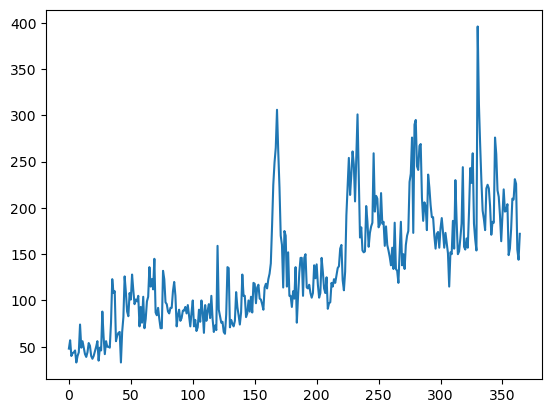

In [71]:
subs.plot()

<AxesSubplot:>

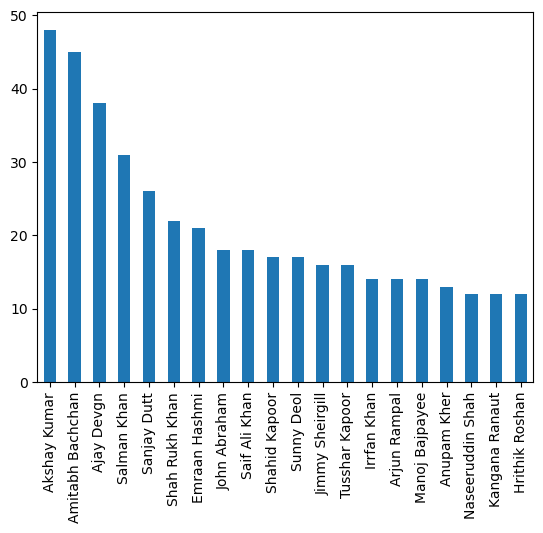

In [72]:
movies.value_counts().head(20).plot(kind='bar')

<AxesSubplot:ylabel='lead'>

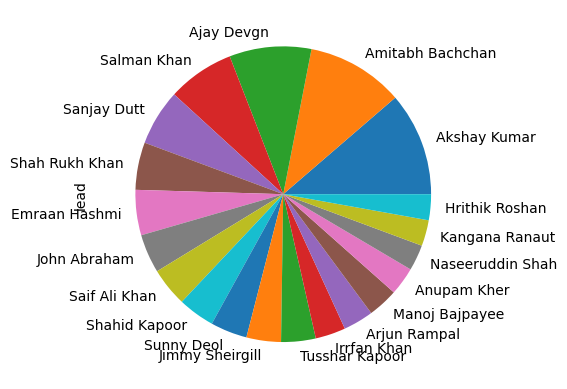

In [73]:
movies.value_counts().head(20).plot(kind='pie') # plotting top 20 actors movies count

### Some Important Series Methods

In [76]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [77]:
import numpy as np
import pandas as pd

In [80]:
subs = pd.read_csv('subs.csv').squeeze()
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [82]:
vk = pd.read_csv('kohli_ipl.csv',index_col='match_no').squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [84]:
movies = pd.read_csv('bollywood.csv',index_col='movie').squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [85]:
# astype - changes the type of the data
import sys
sys.getsizeof(vk) # currently its int64 for the values in vk

3456

In [87]:
vk.astype('int16')

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int16

In [88]:
sys.getsizeof(vk.astype('int16'))

2166

In [90]:
# basically this checks the values exists or not in betwen a range
# false means the values is not in the range, true means value is in the range
vk.between(51,99) # both 51 and 99 are included

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [91]:
# between - gives 
vk[vk.between(51,99)]

match_no
34     58
41     71
44     56
45     67
52     70
57     57
68     73
71     51
73     58
74     65
80     57
81     93
82     99
85     56
97     67
99     73
103    51
104    62
110    82
116    75
117    79
119    80
122    52
127    75
129    54
131    54
132    62
134    64
137    55
141    58
144    57
145    92
148    68
152    70
160    84
162    67
175    72
178    90
188    72
197    51
198    53
209    58
213    73
Name: runs, dtype: int64

In [92]:
vk[vk.between(51,99)].size

43

In [ ]:
# clip
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [93]:
subs.clip(100,200) # values below 100 are made to 100 and values above 200 are made to 200

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [95]:
# drop_duplicates - drops duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [99]:
temp.drop_duplicates() # its dropping the duplicate occurances and keeping the first occurance

0    1
2    2
4    3
6    4
dtype: int64

In [100]:
temp.drop_duplicates(keep='last') # keep last means its dropping other occurances and keeping the last occurance

1    1
3    2
5    3
7    4
dtype: int64

In [102]:
temp.duplicated() # this tells us if the value is duplicated or not

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [103]:
# this give the count sum of duplicated values, here in this case there are 4 duplicated values
temp.duplicated().sum()

4

In [ ]:
vk.duplicated().sum()

137

In [ ]:
movies.drop_duplicates() # this will drop cuplicate values according to actors, because actors are the values

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Sssshhh...                              Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula                  Tanuja
Right Here Right Now (film)                        Ankit
Talaash: The Hunt Begins...                Rakhee Gulzar
The Pink Mirror                          Edwin Fernandes
Name: lead, Length: 566, dtype: object

In [104]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [105]:
temp.size

10

In [106]:
temp.count() # does not count nan values

7

In [108]:
temp.isnull() # gives true where ever null value is there

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [109]:
# isnull
temp.isnull().sum()

3

In [110]:
# dropna - this is used to remove all the missing values 
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

In [111]:
# fillna - this is used to fill the missing values , you can fill 0 or any other value
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

In [112]:
(vk == 49) | (vk == 99)

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [113]:
# isin - used to check multiple things in our data
vk[(vk == 49) | (vk == 99)] # basically in 2 matches he scored 49 and 99

match_no
82    99
86    49
Name: runs, dtype: int64

In [114]:
vk[vk.isin([49,99])] # the above cell code is painful so this function is useful

match_no
82    99
86    49
Name: runs, dtype: int64

In [115]:
# apply - this function is used to apply custom logic on each value
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [117]:
movies.apply(lambda x:x.split())

movie
Uri: The Surgical Strike                   [Vicky, Kaushal]
Battalion 609                                [Vicky, Ahuja]
The Accidental Prime Minister (film)         [Anupam, Kher]
Why Cheat India                            [Emraan, Hashmi]
Evening Shadows                         [Mona, Ambegaonkar]
                                               ...         
Hum Tumhare Hain Sanam                   [Shah, Rukh, Khan]
Aankhen (2002 film)                     [Amitabh, Bachchan]
Saathiya (film)                             [Vivek, Oberoi]
Company (film)                                [Ajay, Devgn]
Awara Paagal Deewana                        [Akshay, Kumar]
Name: lead, Length: 1500, dtype: object

In [118]:
movies.apply(lambda x:x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [119]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')
# good day if the subscribers per day is greater than average else bad day

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

In [120]:
subs.mean()

135.64383561643837

In [ ]:
# copy - 

In [129]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [130]:
new = vk.head()

In [134]:
new

match_no
1    15
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [136]:
new

match_no
1    15
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [132]:
new[1] = 15 # we have edited values and this is changed in the series
# basically head or tail are the view of the data and not the copy of data
# that means any changes will be reflected in the original data series

In [137]:
new = vk.head().copy()

In [138]:
new[1] = 100 # this will not be changed in the original data series

In [141]:
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [142]:
vk

match_no
1      15
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64